In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba # this will throw a warning if using matplotlib 1.5
from sklearn.datasets import make_blobs
import numpy as np

%matplotlib inline

/home/willem/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/willem/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
curry_id = nba.get_player_id("Curry, Stephen")[0]
curry_id

/home/willem/anaconda2/lib/python2.7/site-packages/nbashots/api.py:306: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


201939

In [4]:
# "shots" is the defualt paramter value
players_with_shots = nba.get_all_player_ids("shots")
players_with_shots.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST
0,1505,"Abdul-Wahad, Tariq"
1,949,"Abdur-Rahim, Shareef"
2,203518,"Abrines, Alex"
3,101165,"Acker, Alex"
4,203112,"Acy, Quincy"


In [5]:
players_with_shots.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 2 columns):
PERSON_ID                   1587 non-null int64
DISPLAY_LAST_COMMA_FIRST    1587 non-null object
dtypes: int64(1), object(1)
memory usage: 24.9+ KB


In [6]:
all_data = nba.get_all_player_ids("all_data")
all_data.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


In [7]:
curry_logs = nba.PlayerLog(curry_id)


In [8]:
curry_logs.url_paramaters


{'LeagueID': '00',
 'PlayerID': 201939,
 'Season': '2016-17',
 'SeasonType': 'Regular Season'}

In [9]:
# shots = nba.Shots()

In [10]:
curry_shots_df = nba.Shots(curry_id).get_shots()
curry_made_shots_df = curry_shots_df[curry_shots_df["SHOT_MADE_FLAG"]==1]
curry_missed_shots_df = curry_shots_df[curry_shots_df["SHOT_MADE_FLAG"]==0]

In [11]:
# curry_shots_df.LOC_X
# curry_shots_df.SHOT_MADE_FLAG
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

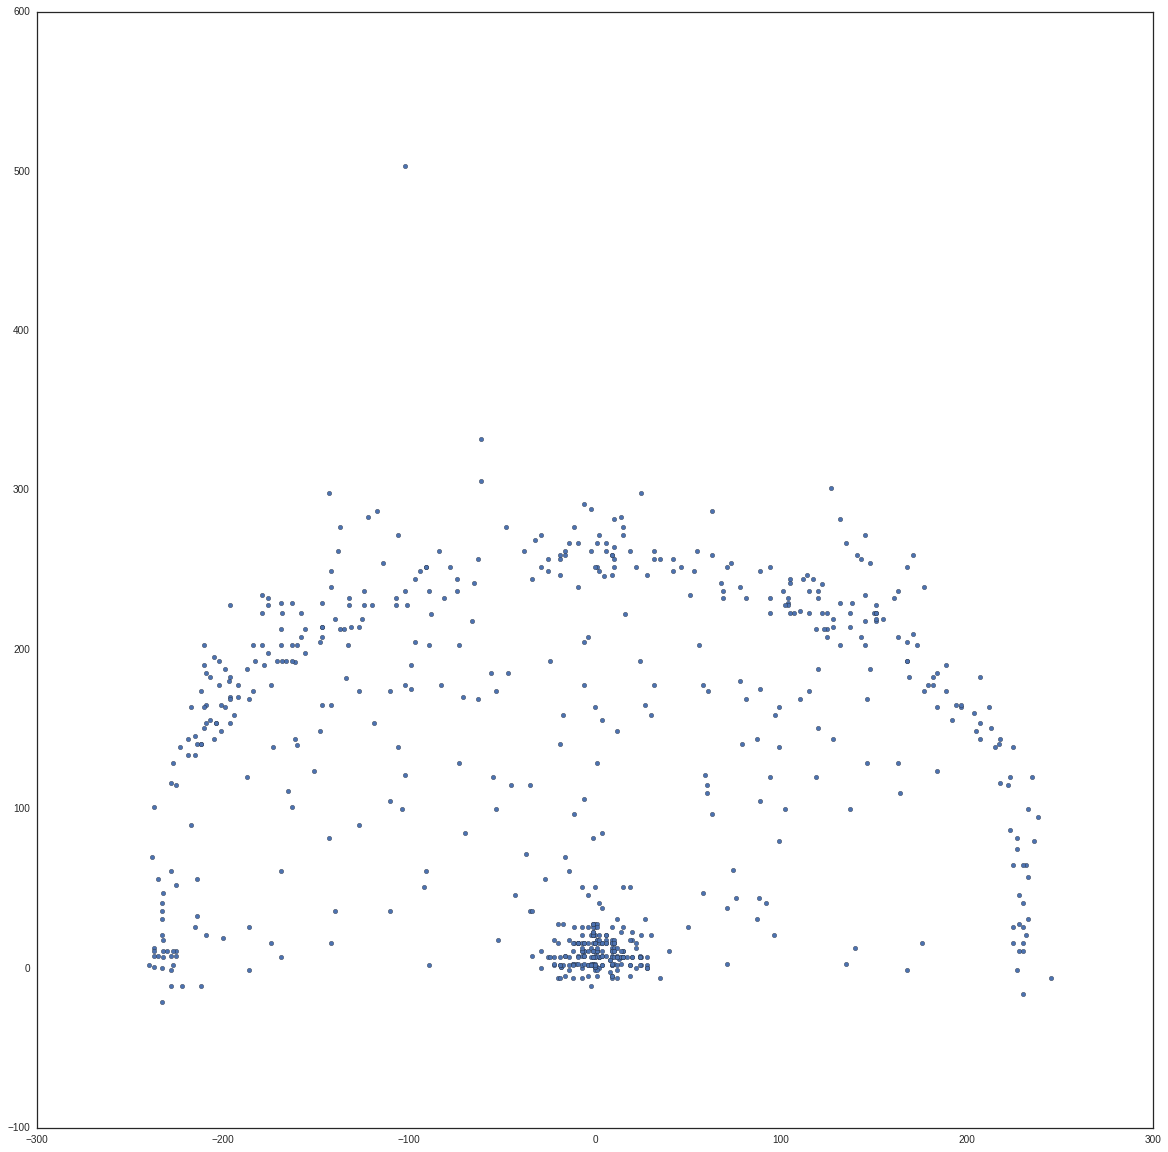

In [29]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.scatter(curry_made_shots_df.LOC_X, curry_made_shots_df.LOC_Y)


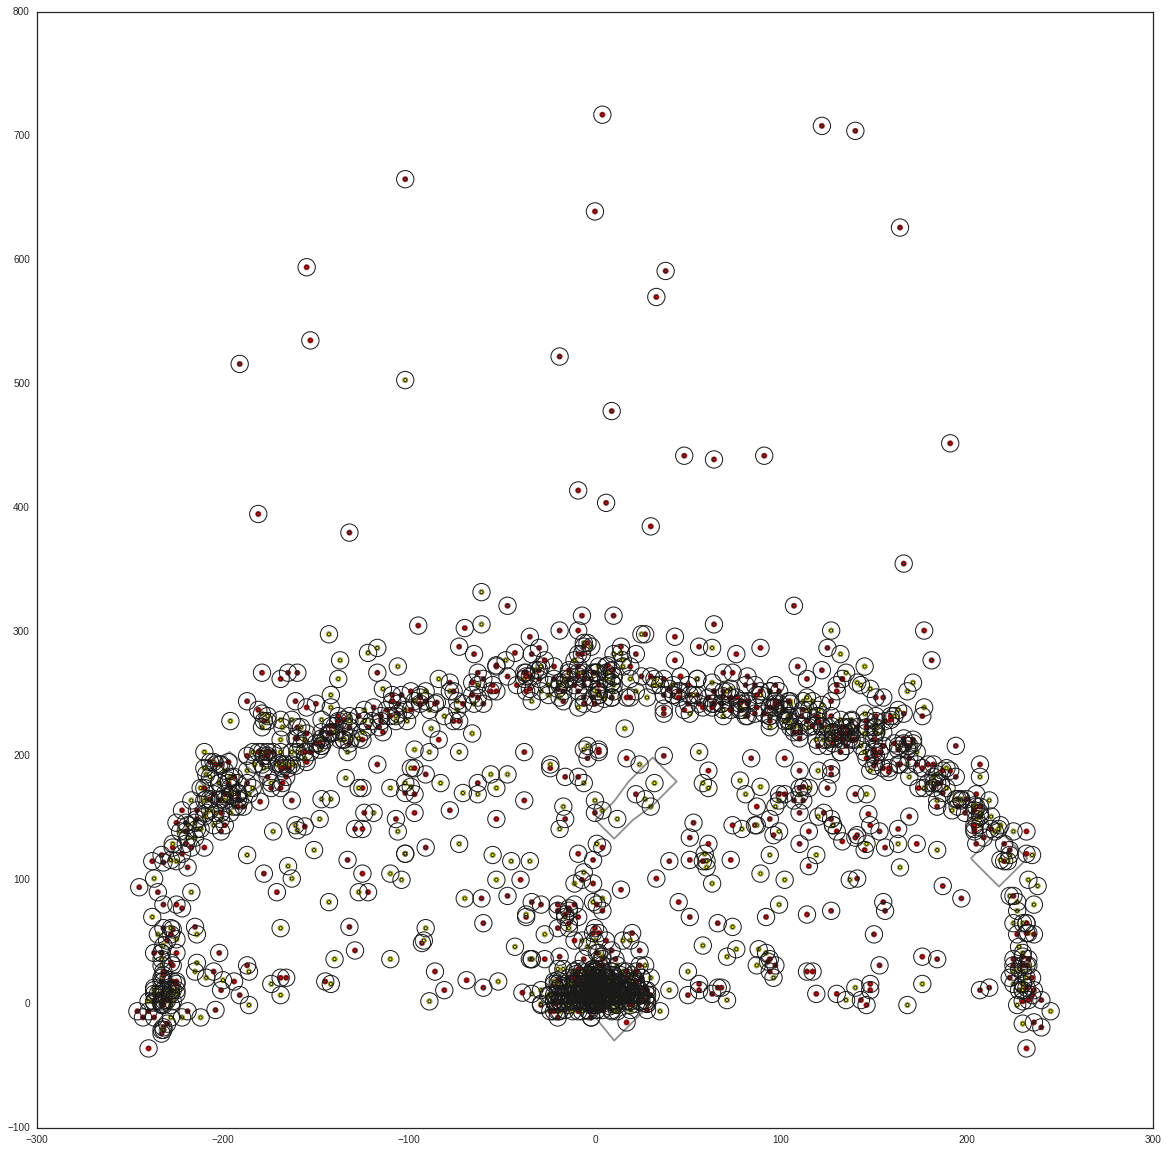

In [13]:
plt.rcParams['figure.figsize'] = (20, 20)
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1E6)
clf.fit((pd.concat([curry_shots_df.LOC_X,curry_shots_df.LOC_Y], axis=1, join='inner')), curry_shots_df.SHOT_MADE_FLAG)

plt.scatter(curry_shots_df.LOC_X, curry_shots_df.LOC_Y, c=curry_shots_df.SHOT_MADE_FLAG, s=30, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=10, lw=1, facecolors='none');

# Shots Curry Has Made


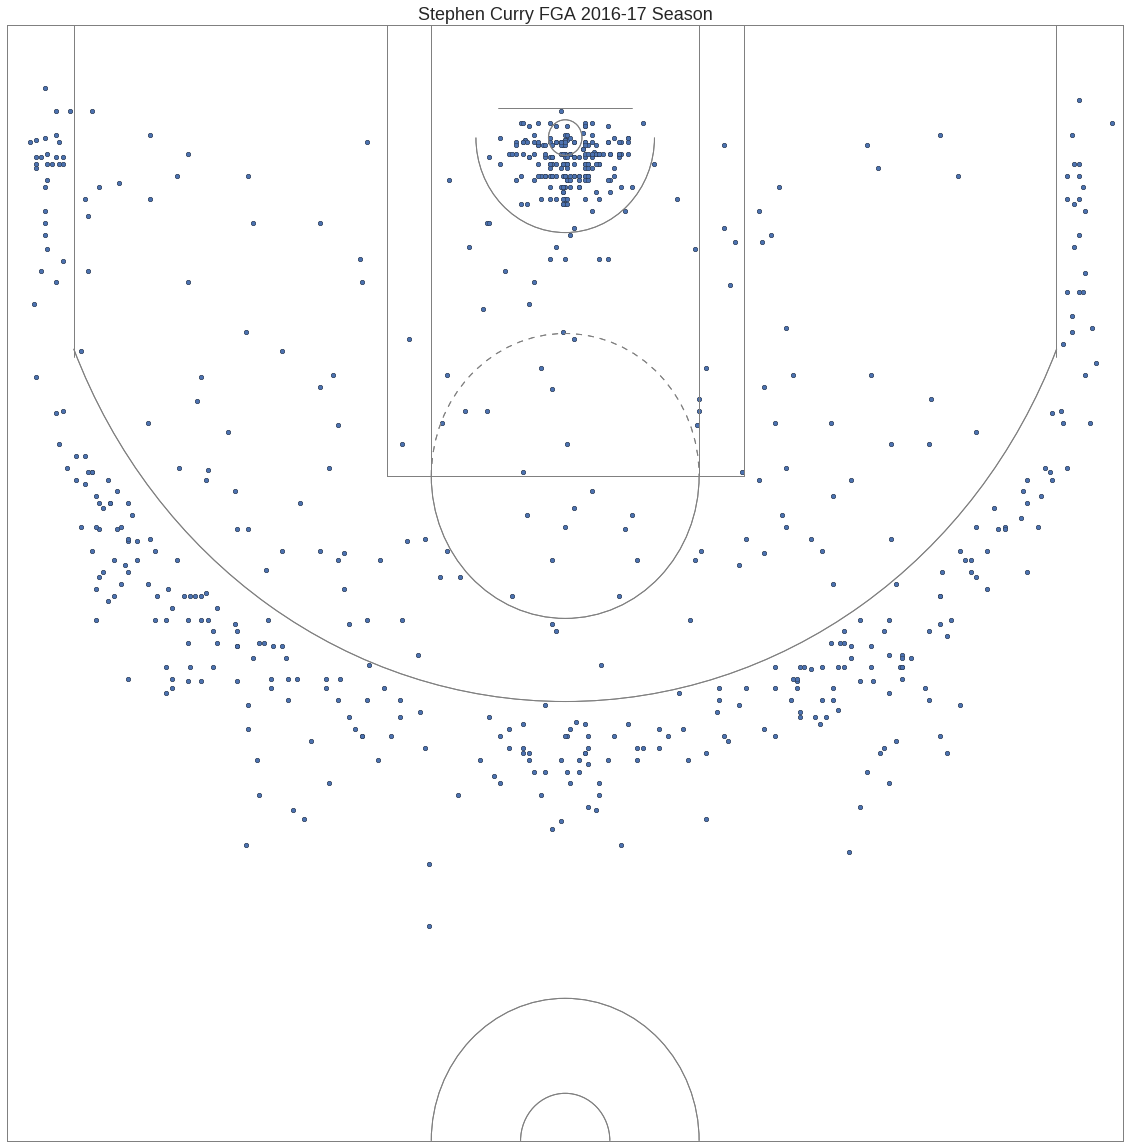

In [14]:

# Pass in Curry's FGA coordinates to shot_charts()
nba.shot_chart(curry_made_shots_df.LOC_X, curry_made_shots_df.LOC_Y,
              title="Stephen Curry FGA 2016-17 Season")

nba.shot_chart(curry_made_shots_df.LOC_X, curry_made_shots_df.LOC_Y,
              title="Stephen Curry FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())
print ""

In [17]:
X = curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())

In [18]:
X.head()

,LOC_X,LOC_Y
0,130,257
1,189,174
2,159,229
3,163,141
4,-9,267


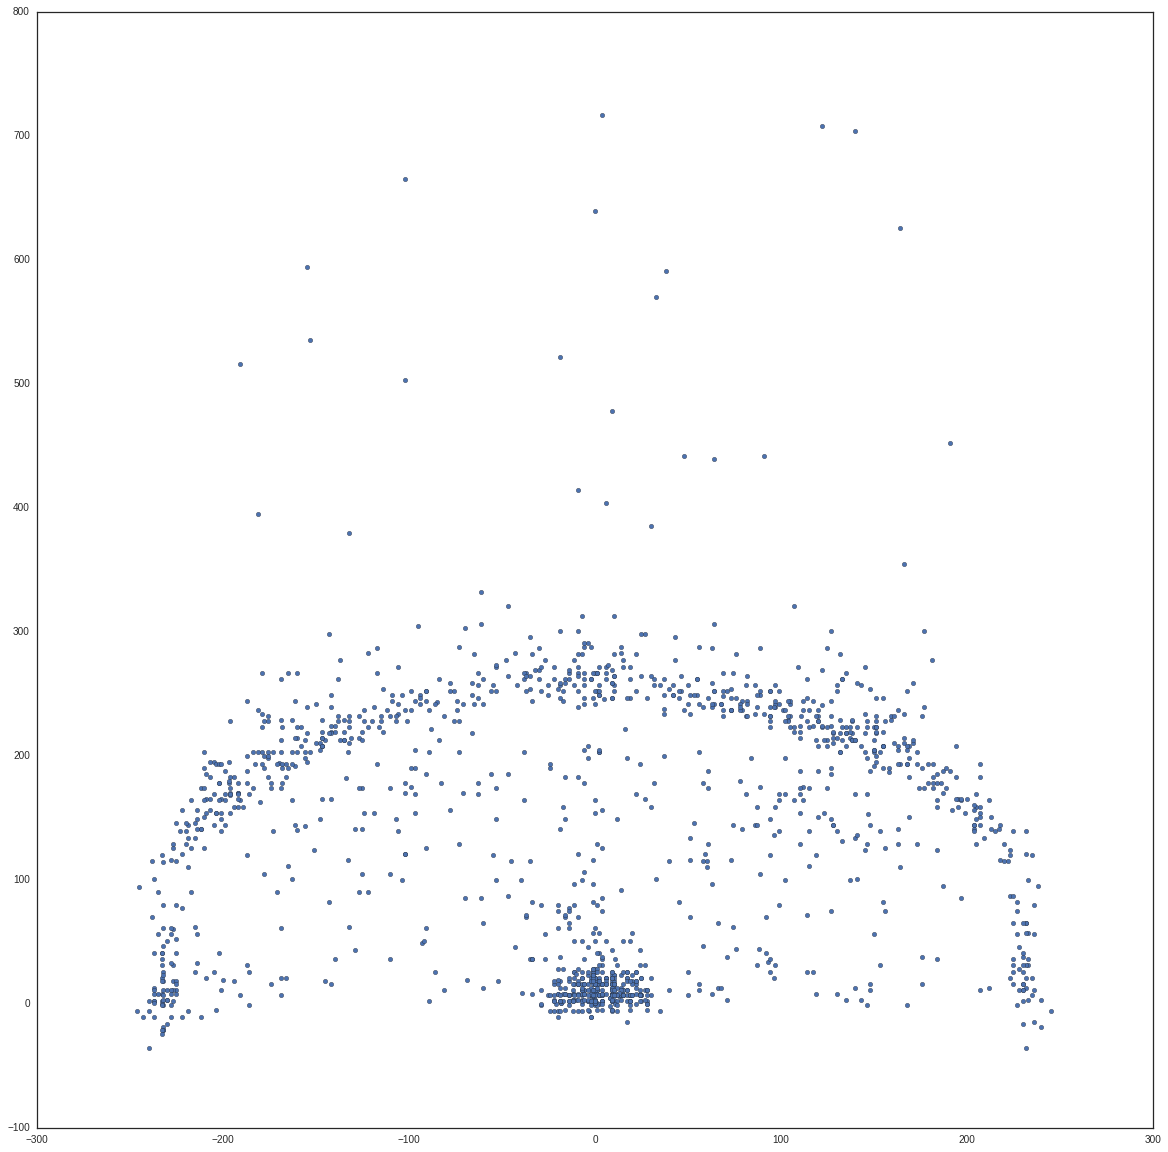

In [19]:
plt.scatter(X.LOC_X, X.LOC_Y)
plt.show()

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

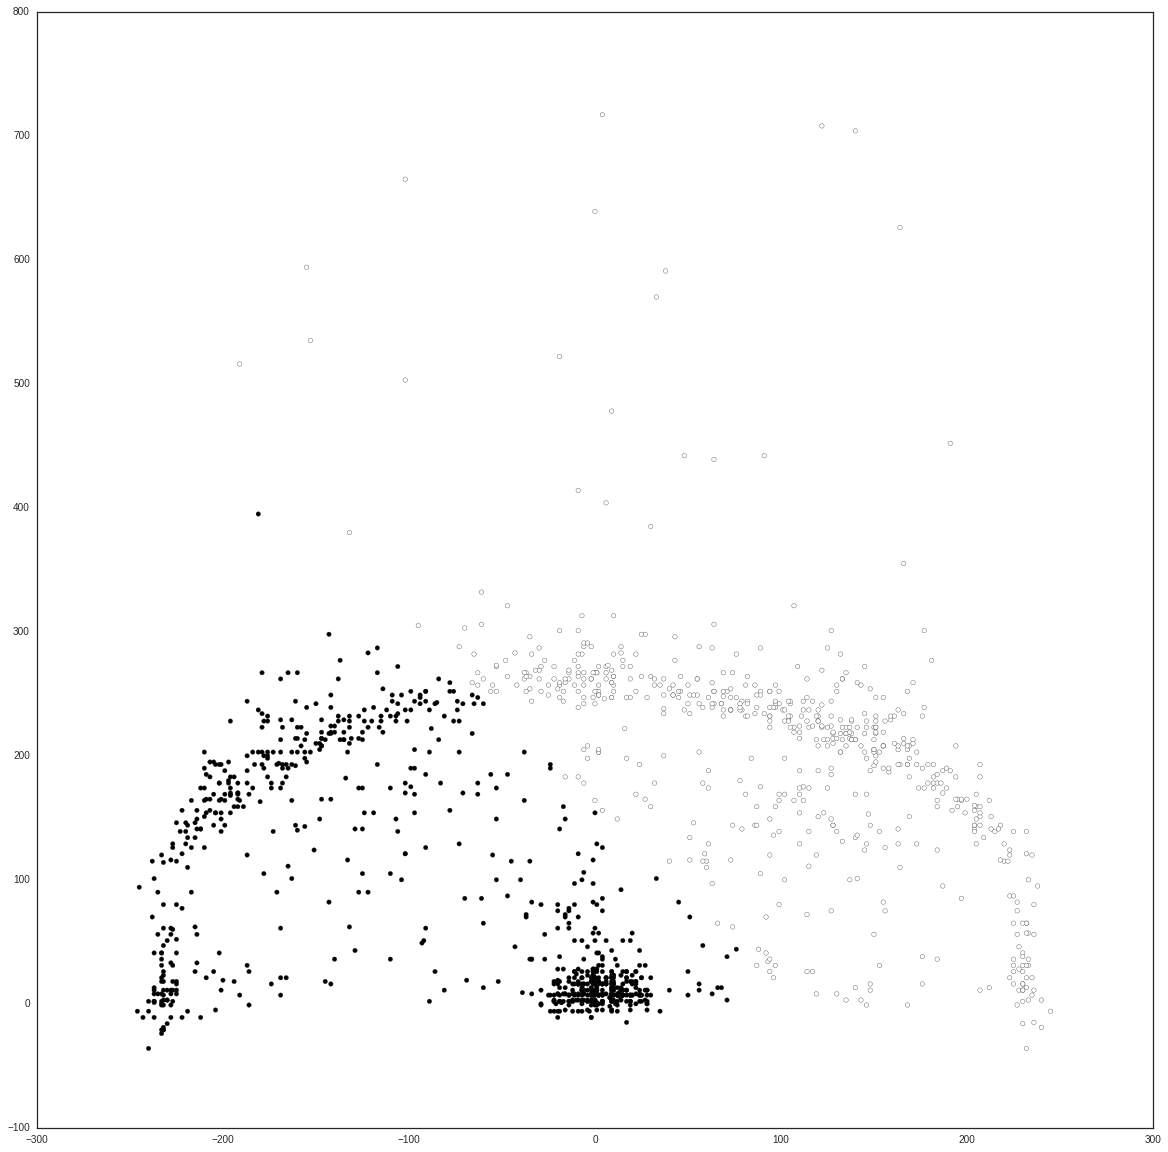

In [21]:
plt.scatter(X.LOC_X, X.LOC_Y, c=labels);
plt.show()

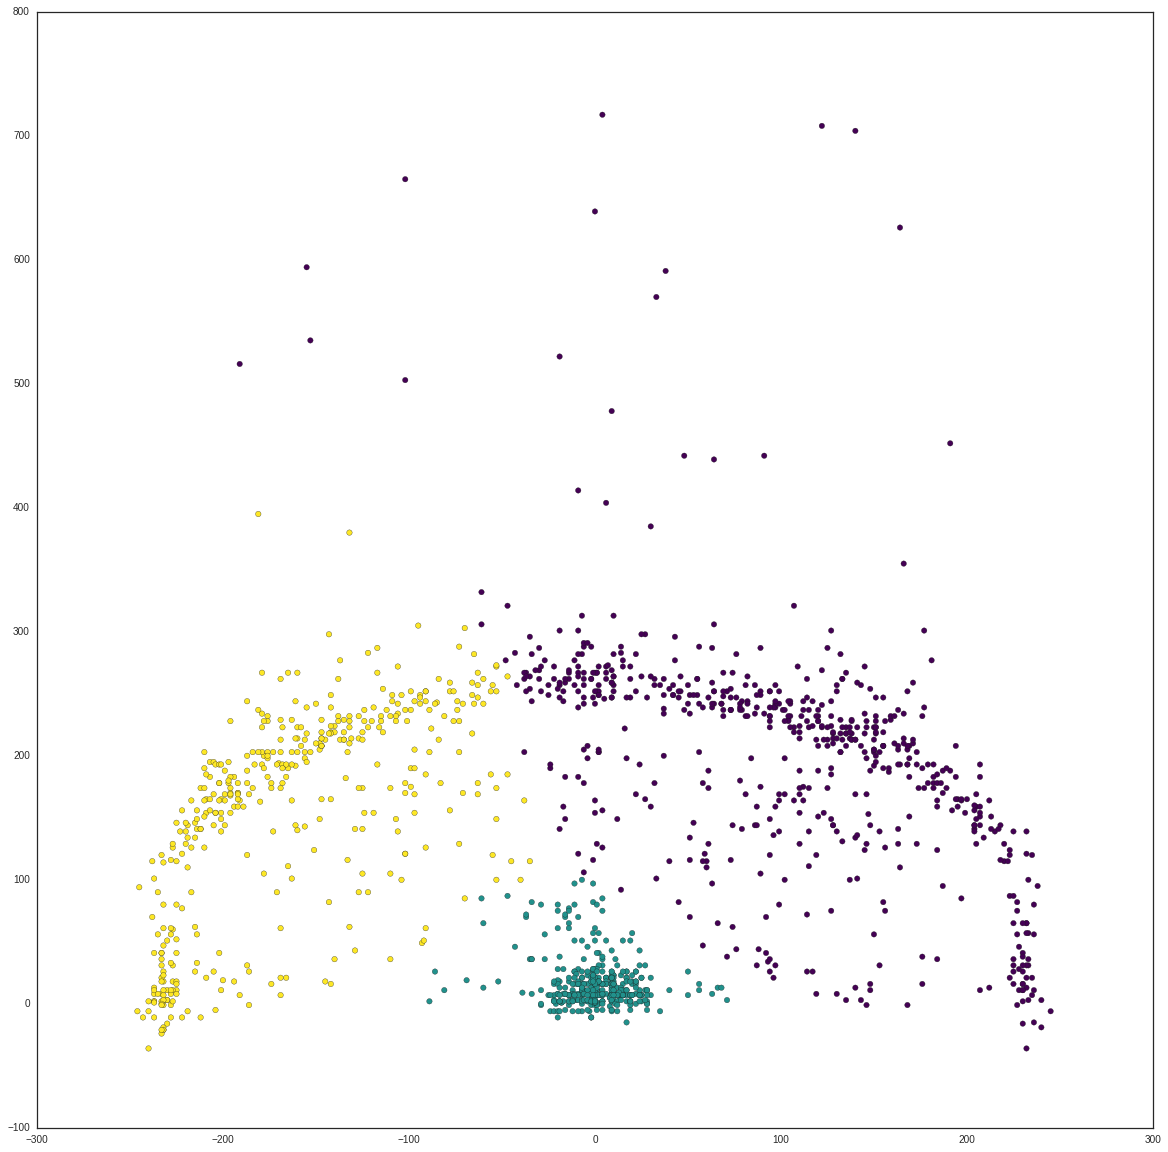

0       130
1       189
2       159
3       163
4        -9
5       -16
6        -1
7       114
8       130
9      -169
10      -73
11       -2
12      225
13        8
14        9
15     -214
16        2
17     -232
18     -107
19      -22
20     -156
21       19
22      105
23     -171
24        9
25      -14
26     -178
27     -228
28       17
29     -138
       ... 
1412    176
1413     -1
1414    218
1415     94
1416    207
1417     86
1418    -11
1419     -1
1420   -132
1421     -9
1422     22
1423   -183
1424   -160
1425   -153
1426     78
1427   -212
1428   -202
1429   -232
1430    -35
1431     87
1432   -233
1433      0
1434    122
1435    -60
1436    227
1437    184
1438    122
1439    -16
1440   -232
1441     -1
Name: LOC_X, dtype: int64

In [22]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()


X.LOC_X

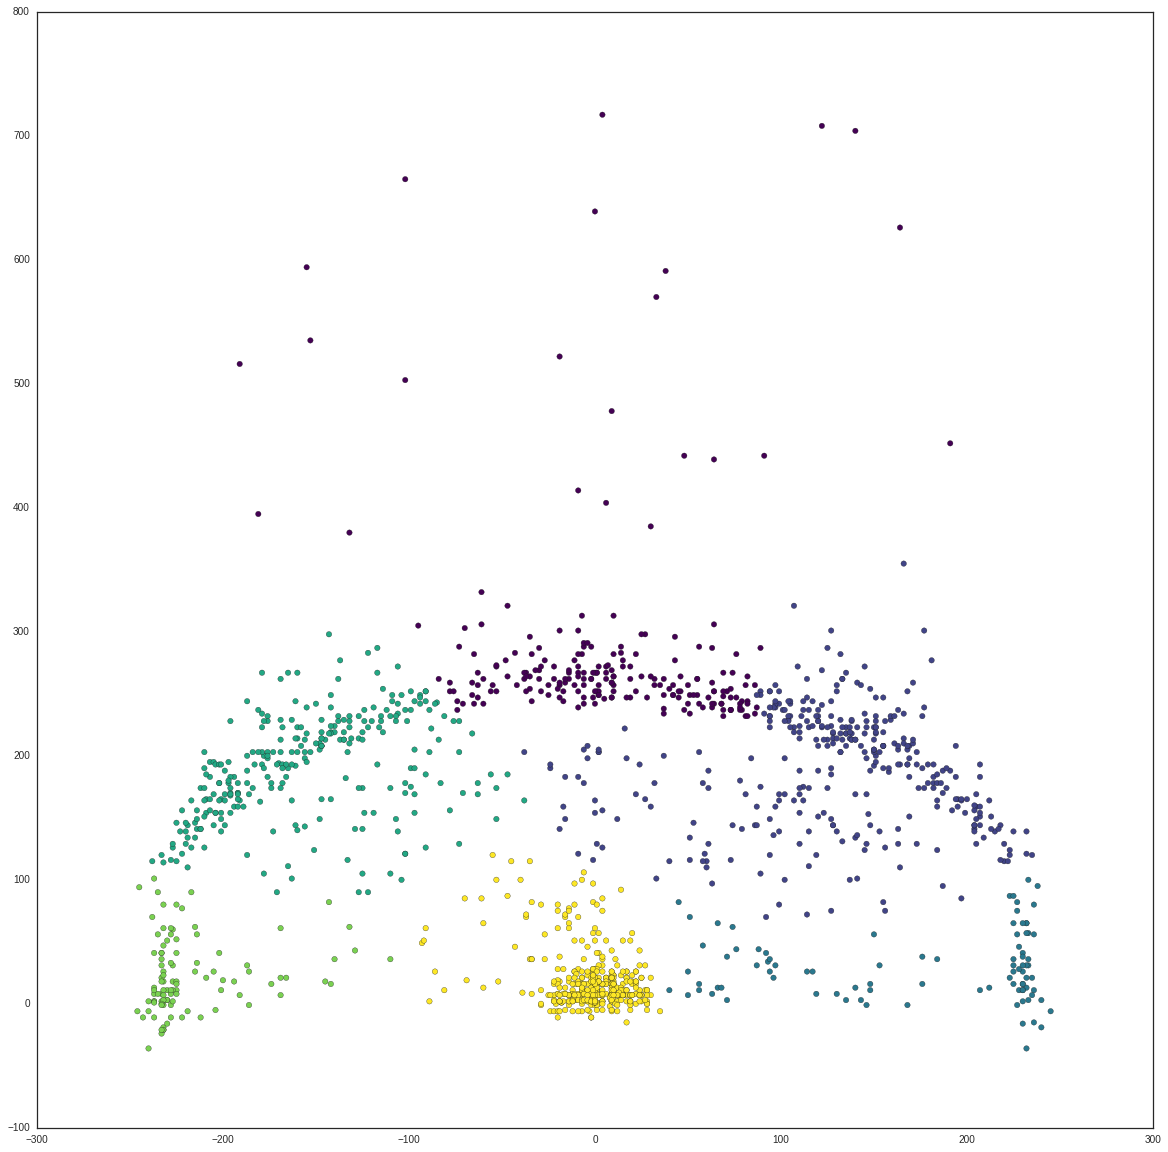

In [23]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",
                                            connectivity=None,
                                            n_clusters=6)
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

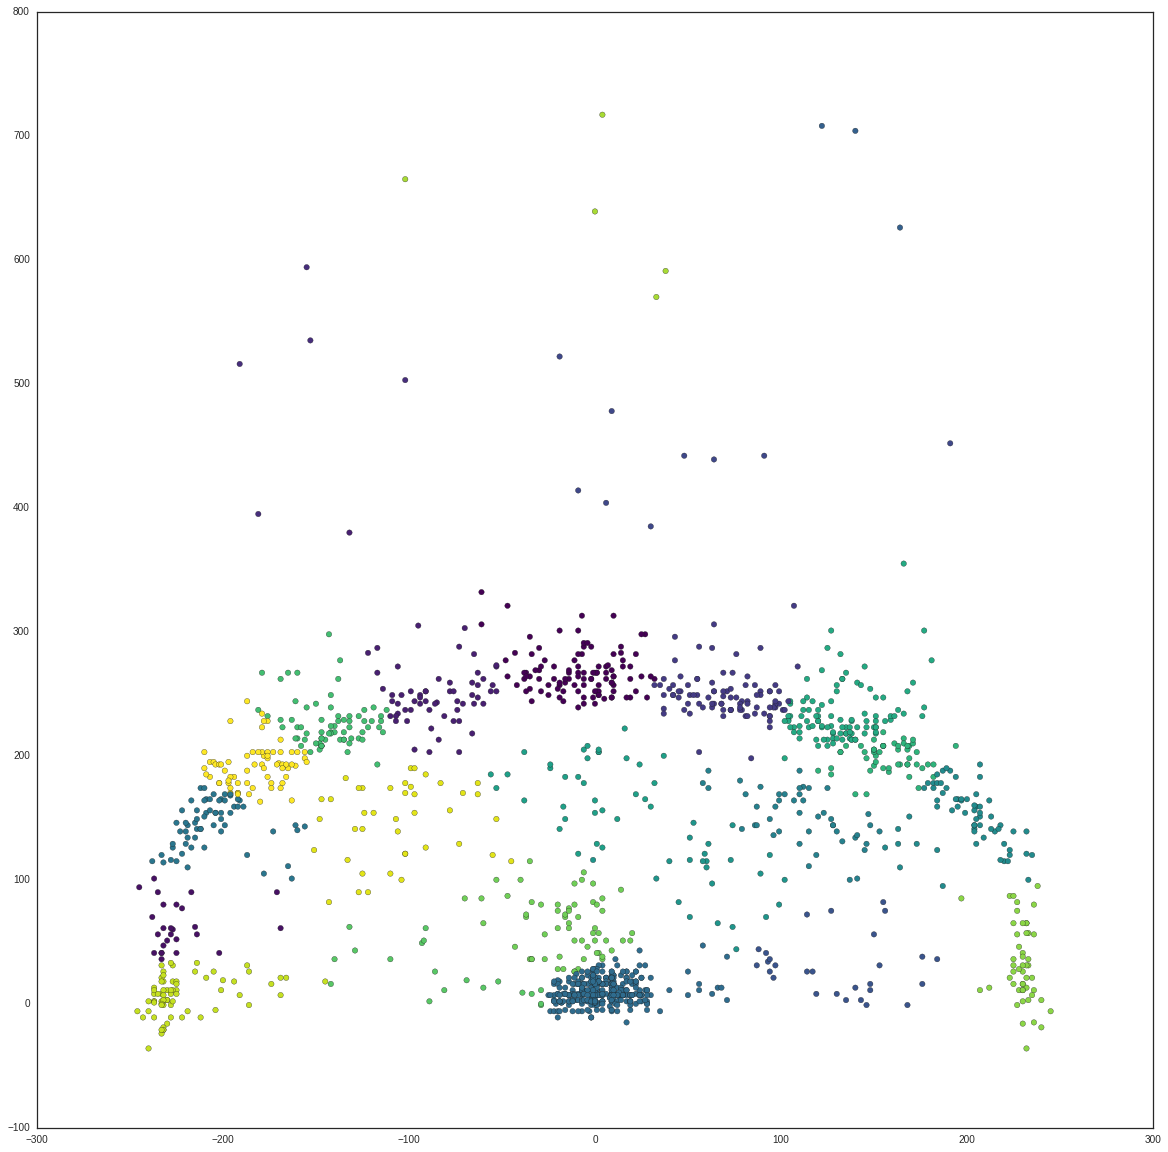

pandas.core.series.Series

In [24]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation()
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

type(X.LOC_X)

In [25]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
# knn_graph = kneighbors_graph(X, 3, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X.LOC_X, X.LOC_Y, c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

NameError: name 'knn_graph' is not defined